In [5]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Lecture 25 #

## Average (Mean) 

There are many ways to compute the mean (average).

In [6]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9], dtype=int64)

In [7]:
sum(values)/len(values)

4.25

In [8]:
np.average(values)

4.25

In [9]:
np.mean(values)

4.25

In [10]:
(2 + 3 + 3 + 9)/4

4.25

Can also be framed as a weighted average of the unique values.

In [11]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [12]:
2*0.25 + 3*0.5 + 9*0.25

4.25

In [13]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


In [14]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.ihist('value', bins = bins_for_display)

In [15]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

In [16]:
Table().with_column('value', new_vals).ihist(bins = bins_for_display)

In [17]:
np.average(new_vals)

4.25

In [18]:
np.mean(new_vals)

4.25

You may have been wondering (as was I), why we have both `np.mean` and `np.average` if they do the same thing.  Well it turns out `np.average` can do a little more.  It allows us to specify weights.  Notice, if I scale the weights it doesn't affect the average. 

In [19]:
np.average(make_array(2,3,9), weights = make_array(10,20,10))

4.25

## Average as Center of Mass

This is the balance point of a distribution.  

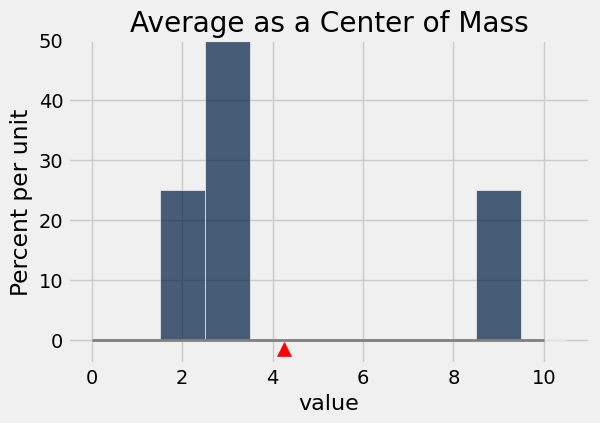

In [20]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)
plots.ylim(-0.04, 0.5)
plots.plot([0, 10], [0, 0], color='grey', lw=2)
plots.scatter(4.25, -0.015, marker='^', color='red', s=100)
plots.title('Average as a Center of Mass');

<br><br><br><br>

---

Return to Slides

---

<br><br><br><br>


## Standard Deviation ##

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

In [ ]:
average_value = np.mean(values)
average_value

In [ ]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Excellent!  Now we can just average the deviations to get a sense of spread:

In [ ]:
np.average(deviations)

<br><br><br><br><br><br><br><br>
un oh!!  What just happened.

## Proving that the Average Deviation is Zero:

Suppose we have $n$ values in our array $[x_1, \ldots x_n]$. Let's define the average as:

$$
\mu = \frac{1}{n}\sum_{i=1}^n x_i
$$

Then the average deviation is:

$$
\text{Average Deviation} = \frac{1}{n} \sum_{i=1}^n \left( x_i - \mu \right)
$$

The sum of the differences is the difference of the sums:

\begin{align}
\text{Average Deviation} & =  \frac{1}{n} \sum_{i=1}^n \left( x_i - \mu \right) \\
& = \left( \frac{1}{n} \sum_{i=1}^n x_i \right) - \left(\frac{1}{n} \sum_{i=1}^n \mu \right)\\
& = \left( \frac{1}{n} \sum_{i=1}^n x_i \right) - \frac{n \mu }{n}\\
& = \left( \frac{1}{n} \sum_{i=1}^n x_i \right) - \mu \quad\quad \text{Substituting $\mu$}\\
& = \left( \frac{1}{n} \sum_{i=1}^n x_i \right) - \left( \frac{1}{n}\sum_{i=1}^n x_i \right) \\
& = 0
\end{align}

<br><br><br><br>

So we don't want everything to cancel out.  We want to get rid of the negative values.  We could take the absolute value:

In [ ]:
np.abs(deviations)

If we then average we would get a measure of spread:

In [ ]:
np.average(np.abs(deviations))

This actually has a name -- Average Absolute Deviation and is sometimes used as a measure of spread.  However, as we will see in this and the next few lectures there is a slightly more interesting measure of spread that we will now introduce.

Another way to address the negative values is to square the entries:

In [ ]:
sd_table = sd_table.with_column('Squared Deviation', deviations ** 2)
sd_table

Notice that this makes the extreme values much more extreme. Recall the square function:

In [ ]:
import plotly.express as px
px.line(x = np.arange(-5, 5, 0.1), y = np.arange(-5, 5, 0.1)**2, height = 800)

### Variance

The mean of the squared deviations is another widely used measure of spread called the **Variance**

In [ ]:
# Variance of the data:
# mean squared deviation from average

variance = np.mean(deviations ** 2)
variance

Of course there is a built-in function for that:

In [ ]:
np.var(values)

### Units 

What is the meaning of a variance of 7.6875?  First, what are the units? 

What is the unit of the mean?  If you compute the mean of income in dollars, then the mean is also in dollars? If you compute the variance of income in dollars than the variance is in dollars squared.  _What is a square dollar?_

### Standard Deviation

To make the variance easier to interpret and restore it to the original units of the data, we take the square root.  This new statistic is called the **standard deviation**:

In [ ]:
# Standard Deviation (SD): 
# root mean squared deviation from average
# = square root of the variance

sd = variance ** 0.5
sd

In [ ]:
np.std(values)

<br><br><br><br>

---

Return to Slides

---

<br><br><br><br>


## Chebyshev's Bounds: "Tail" Bounds ##


In [21]:
def chebyshev(num_SDs):
    """
    Returns a LOWER BOUND on the fraction of the data 
    within num_SDs of the mean.
    
    Put another way AT LEAST chebyshev(z) data is within mean +/- z * SDs.
    """
    return 1 - 1 / (num_SDs**2)

Proportion in the range "mean +/- 2 SDs"

In [22]:
chebyshev(2)

0.75

Proportion in the range "mean +/- 3.5 SDs"

In [23]:
chebyshev(3.5)

0.9183673469387755

Proportion in the range "mean +/- 0.5 SDs"

In [24]:
chebyshev(1.1)

0.17355371900826455

In [25]:
chebyshev(0.5)

-3.0

Chebyshev's bound: this proportion is AT LEAST.  

<br><br><br>
### Testing the Bound on Real Data

In [26]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')

In [27]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

In [28]:
births.ihist(overlay = False)

### Examining Maternal Pregnancy Weight 

Compute the mean and standard deviation

In [29]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

What fraction of the data is actually within 3 standard deviations?

In [30]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

within_3_SDs.num_rows / births.num_rows # Proportion within 3 SDs of the mean

0.9863713798977853

What does Chebyshev say?

In [31]:
# Chebyshev's bound: 
# This proportion should be at least
print("Chebyshev says that at least", round(chebyshev(3),2), 
      "of the rows will be within 3 standard deviations of the mean")

Chebyshev says that at least 0.89 of the rows will be within 3 standard deviations of the mean


Running the same calculation for all the columns in births

In [32]:
# See if Chebyshev's bounds work for distributions with various shapes


for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%',
              " which is > ", np.round(chebyshev(z) *100, 2), "(Chebyshev)")


Birth Weight
Average plus or minus 2 SDs: 94.89 %  which is >  75.0 (Chebyshev)
Average plus or minus 3 SDs: 99.57 %  which is >  88.89 (Chebyshev)
Average plus or minus 4 SDs: 100.0 %  which is >  93.75 (Chebyshev)
Average plus or minus 5 SDs: 100.0 %  which is >  96.0 (Chebyshev)

Gestational Days
Average plus or minus 2 SDs: 93.78 %  which is >  75.0 (Chebyshev)
Average plus or minus 3 SDs: 98.64 %  which is >  88.89 (Chebyshev)
Average plus or minus 4 SDs: 99.57 %  which is >  93.75 (Chebyshev)
Average plus or minus 5 SDs: 99.83 %  which is >  96.0 (Chebyshev)

Maternal Age
Average plus or minus 2 SDs: 94.89 %  which is >  75.0 (Chebyshev)
Average plus or minus 3 SDs: 99.91 %  which is >  88.89 (Chebyshev)
Average plus or minus 4 SDs: 100.0 %  which is >  93.75 (Chebyshev)
Average plus or minus 5 SDs: 100.0 %  which is >  96.0 (Chebyshev)

Maternal Height
Average plus or minus 2 SDs: 97.19 %  which is >  75.0 (Chebyshev)
Average plus or minus 3 SDs: 99.66 %  which is >  88.89 (Che

<br><br><br><br>

---

Return to Slides

---

<br><br><br><br>


## Standard Units ##

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [ ]:
ages = births.column('Maternal Age')
ages

In [ ]:
ages_standard_units = standard_units(ages)
ages_standard_units

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

<br><br><br><br>

---

Return to Slides

---

<br><br><br><br>


## Discussion Question 

In [ ]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

In [ ]:
np.mean(ages), np.std(ages)

In [ ]:
both.ihist('Age in Years', bins = np.arange(15, 46, 2))

In [ ]:
both.ihist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))

## The SD and Bell Shaped Curves 

In [ ]:
births.ihist('Maternal Height', bins = np.arange(56.5, 72.6, 1), height=800)
# plots.xticks(np.arange(57, 72, 2));

Estimates by eye

The average is approximately: 

Locate the point of inflection on the right. The SD is approximately:

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)